In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

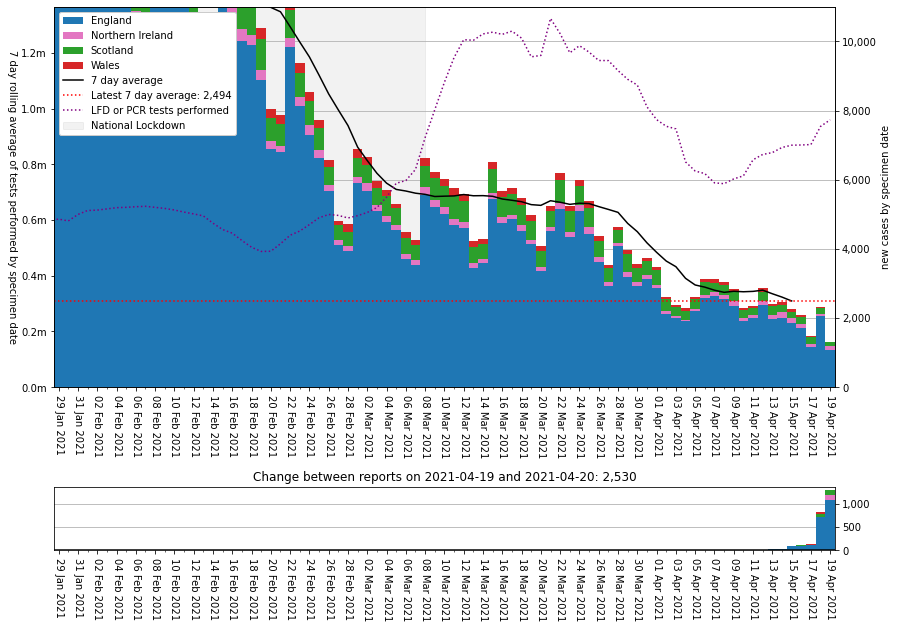

In [2]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

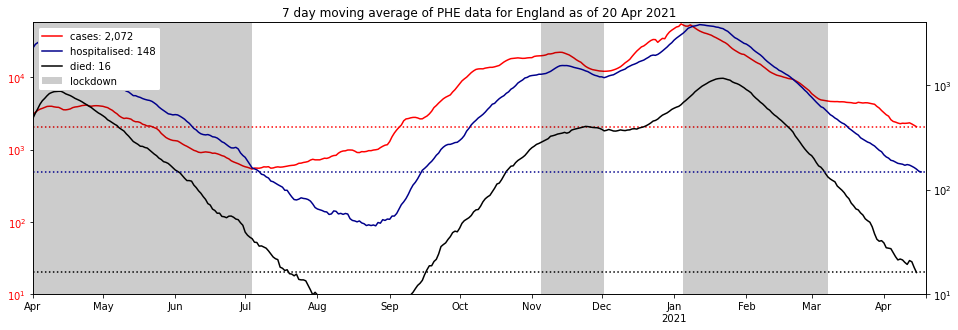

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

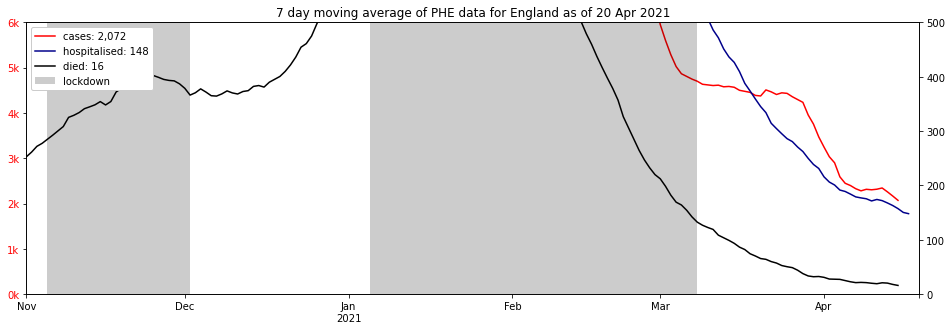

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=6_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

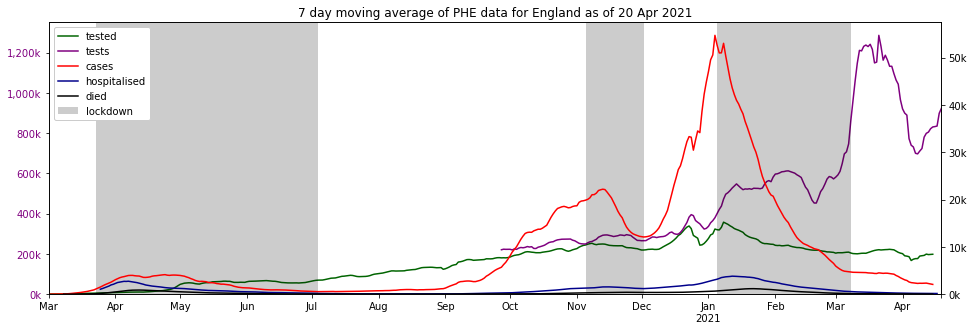

In [5]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [6]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,19 Apr 21,"+8,734,163","+27,713,634","+8,734,163","+215,665","+85,055","+215,665"
Northern Ireland,19 Apr 21,"+283,478","+869,342","+283,478","+9,859","+5,630","+9,859"
Scotland,19 Apr 21,"+797,267","+2,750,052","+797,267","+40,152","+2,358","+40,152"
Wales,19 Apr 21,"+610,882","+1,699,092","+610,882","+8,075","+6,629","+8,075"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,8734163.0,27713634.0,18979471.0,56286961,15.517205,33.719125,50.763670
1,Northern Ireland,N92000002,283478.0,869342.0,585864.0,1893667,14.969791,30.938069,54.092140
2,Scotland,S92000003,797267.0,2750052.0,1952785.0,5463300,14.593140,35.743690,49.663171
3,Wales,W92000004,610882.0,1699092.0,1088210.0,3152879,19.375371,34.514804,46.109825


'partial: 33,032,120 (49.5%), full: 10,425,790'

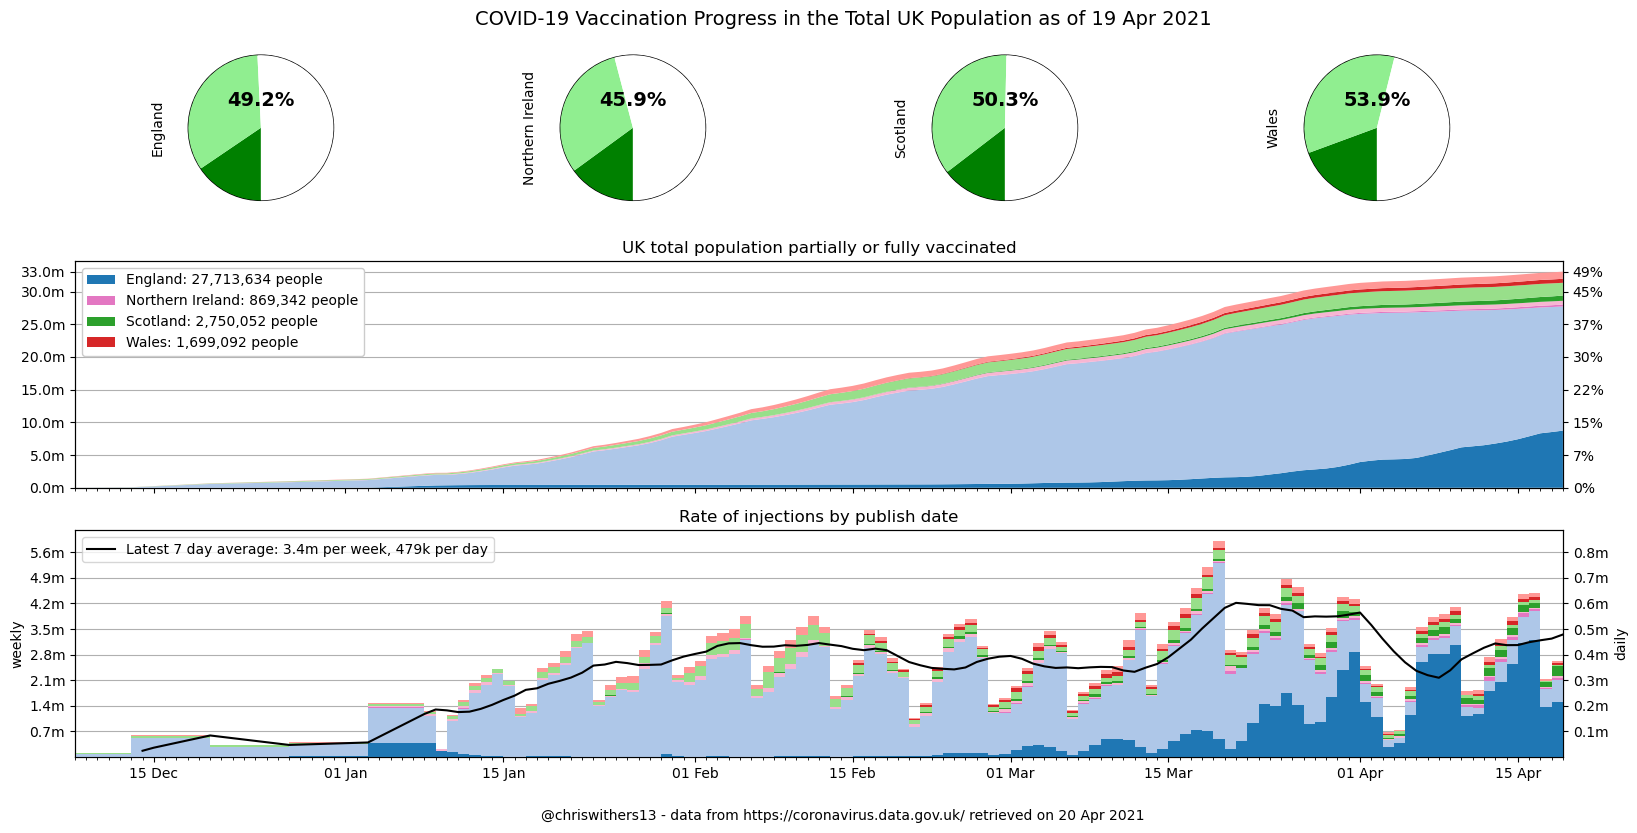

In [7]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

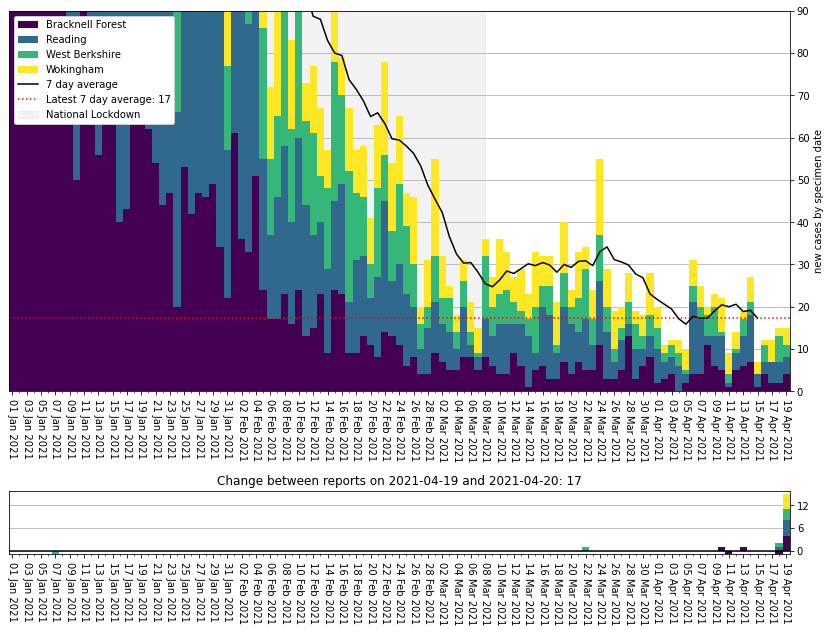

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=90)

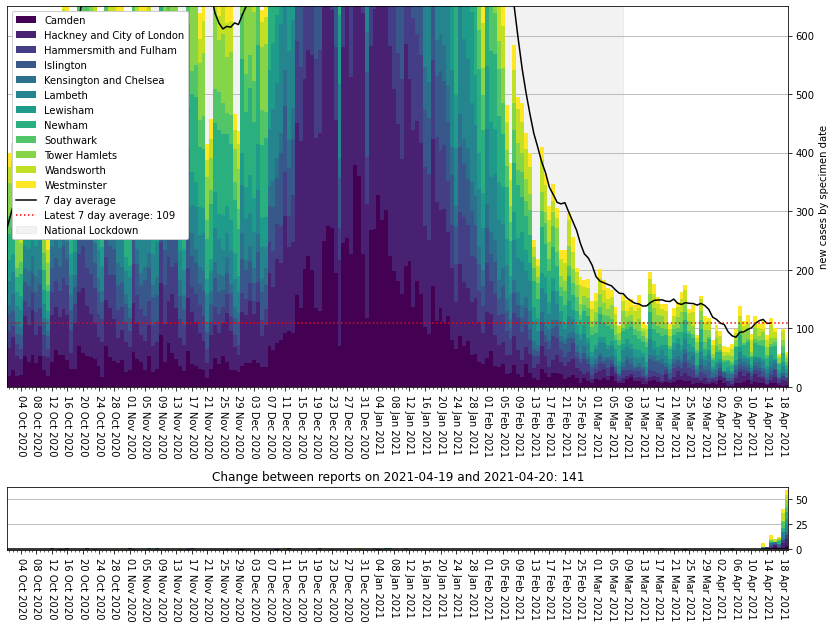

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
N09000005,Derry City and Strabane,113.032442,171.0,2021-04-19
E08000017,Doncaster,61.560165,192.0,2021-04-19
N09000009,Mid Ulster,55.881719,83.0,2021-04-19
N09000010,"Newry, Mourne and Down",55.687883,101.0,2021-04-19
E06000039,Slough,55.503915,83.0,2021-04-19
S12000005,Clackmannanshire,52.386496,27.0,2021-04-19
E06000032,Luton,51.630588,110.0,2021-04-19
E07000136,Boston,49.876733,35.0,2021-04-19
E08000016,Barnsley,49.824601,123.0,2021-04-19


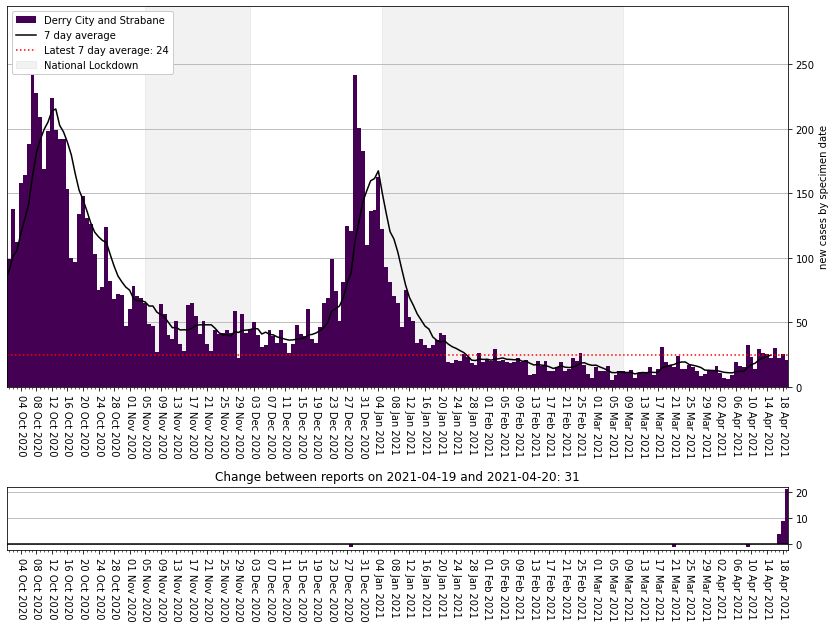

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,40.976424,325.0,2021-04-19
S12000049,Glasgow City,44.383371,281.0,2021-04-19
E08000025,Birmingham,21.894946,250.0,2021-04-19
E08000032,Bradford,45.389198,245.0,2021-04-19
E08000019,Sheffield,40.352020,236.0,2021-04-19
E08000003,Manchester,39.793220,220.0,2021-04-19
E08000034,Kirklees,49.569451,218.0,2021-04-19
E08000017,Doncaster,61.560165,192.0,2021-04-19
E06000016,Leicester,49.121460,174.0,2021-04-19


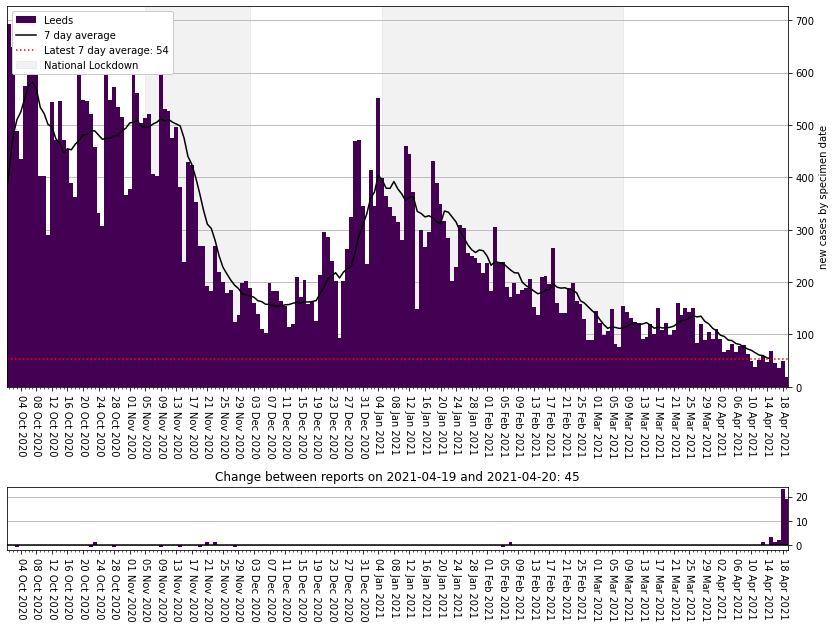

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.7
phe_max = 0.13

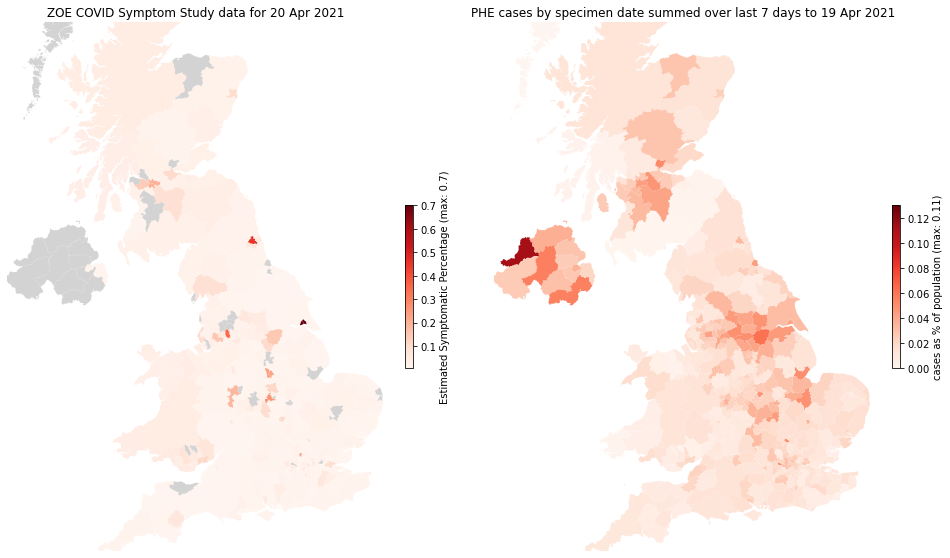

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...